# Определение возраста покупателей

Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы: 
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.
Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

In [2]:
#Библиотеки
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/faces/labels.csv')
display(data.head())
data.shape

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


(7591, 2)

In [4]:
data.shape

(7591, 2)

In [5]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [6]:
graph = data[['real_age']].value_counts()
graph = pd.DataFrame(graph).reset_index()
graph.columns=['real_age', 'numb']
graph = graph.sort_values(by='numb', ascending=False)

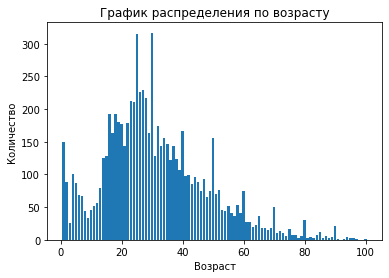

In [8]:
figsize=(15,12)
plt.bar(graph['real_age'], graph['numb'])
plt.title('График распределения по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество');

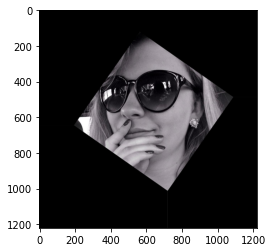

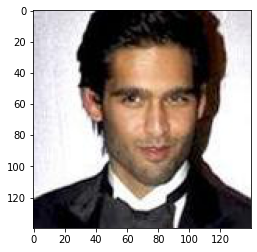

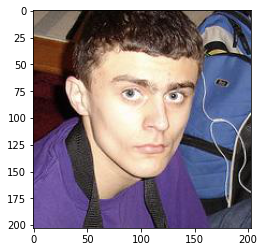

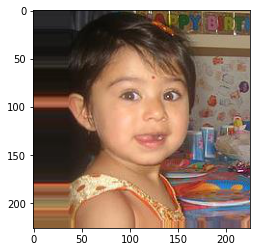

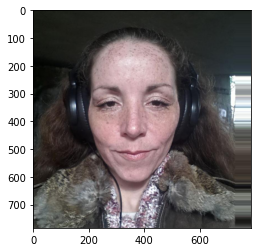

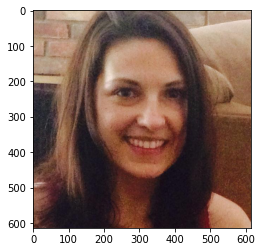

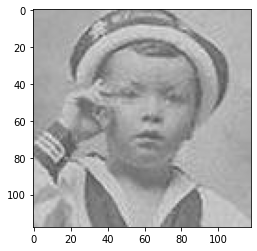

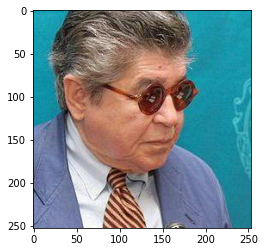

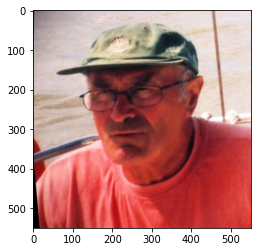

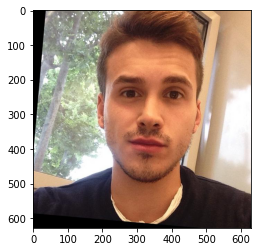

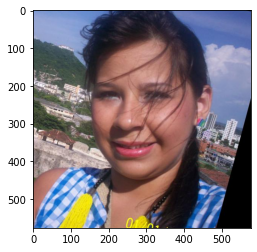

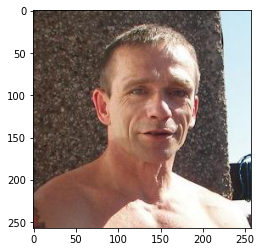

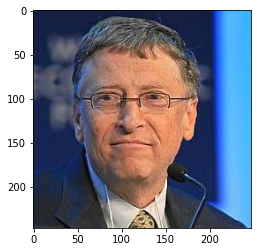

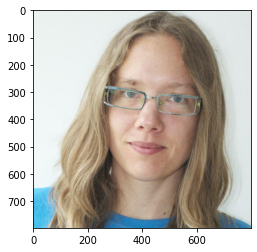

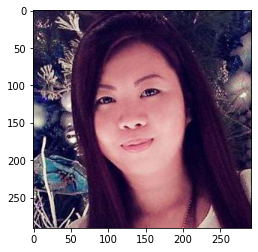

In [9]:
for i in range(1, 16):
    rnd = random.randrange(1000,7613)
    try:
        add = '/datasets/faces/final_files/' + '00' + str(rnd) + '.jpg'
        plt.imshow(Image.open(add))
        plt.show()
    except: 
        print('ОЙ')

Выводы

В редоставленных данных 7591 фотография лица с указанием возраста человека.

Распределение по возрасту не равномерное, однако вполне соответствует жиизни) Cредний возраст около 31 года.

В выборке минимальном количестве содержатся лице старше 80 лет, что может негативно отразиться на правильном определении возраста среди этой группы лиц.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python


def load_test(path):
    labels = pd.read_csv(path+'labels.csv') 
    test_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.25)
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=8888) 
    return test_datagen_flow


def load_train(path):
    labels = pd.read_csv(path+'labels.csv') 
    train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.25,
                                   horizontal_flip=True,
                                   brightness_range=(0.8, 1.))

    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
      directory=path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='training',
      seed=8888)
    return train_datagen_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(1, activation='relu')) 
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer,loss='mse',metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

```
Train for 178 steps, validate for 60 steps
Epoch 1/10
2023-08-28 19:41:56.834098: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-28 19:41:57.251042: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 65s - loss: 240.0132 - mae: 11.0306 - val_loss: 1058.1770 - val_mae: 27.9735
Epoch 2/10
178/178 - 55s - loss: 74.4038 - mae: 6.5123 - val_loss: 849.4369 - val_mae: 24.2052
Epoch 3/10
178/178 - 54s - loss: 48.8024 - mae: 5.3000 - val_loss: 543.2463 - val_mae: 17.9923
Epoch 4/10
178/178 - 55s - loss: 36.2064 - mae: 4.5974 - val_loss: 126.9399 - val_mae: 8.9100
Epoch 5/10
178/178 - 55s - loss: 29.0409 - mae: 4.1180 - val_loss: 93.2239 - val_mae: 7.4320
Epoch 6/10
178/178 - 54s - loss: 23.4704 - mae: 3.6656 - val_loss: 122.8582 - val_mae: 8.7781
Epoch 7/10
178/178 - 55s - loss: 18.8525 - mae: 3.3367 - val_loss: 89.7518 - val_mae: 7.0960
Epoch 8/10
178/178 - 55s - loss: 16.0866 - mae: 3.0730 - val_loss: 68.8224 - val_mae: 6.2515
Epoch 9/10
178/178 - 53s - loss: 12.6758 - mae: 2.7097 - val_loss: 69.9834 - val_mae: 6.1446
Epoch 10/10
178/178 - 63s - loss: 11.9339 - mae: 2.6250 - val_loss: 86.4138 - val_mae: 7.2523
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 11s - loss: 86.4138 - mae: 7.2523
Test MAE: 7.2523
```

## Анализ обученной модели

По ТЗ нужно было построить и обучить модель, определяющую возраст человека по фото с камер прикассовой зоны. При этом 
значение MAE на тестовой выборке должно быть не больше 8.


В нашем распоряжении были фотографии, не всегда качественные,некоторые были выполнены с поворотом.
Датасет разделили на обучающую и тестовую выборку. 

За основу была взята модель нейросети с архитектурой, далее дообучили её на наших данных. В выходном слое,для более точного обучения модели, использовали оптимизацию Adam, а в качестве функции потерь использовалась accuracy.
По результатам обучения нейросети тестовое MAE 7.25, что соответствует требованиям ТЗ.